In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import math

In [2]:
def LineGenerate(lenght, m):
    """
    Creating a line with m random segments
    """
    line = np.zeros(lenght,)
    ab = np.array(sorted(random.sample(range(0, lenght-1), m*2))) # random start and end of the segments
    ab = ab.reshape((m,2)) # start and end of the segments coordinates
    return ab

In [3]:
def MultipleLines(line_lenght, min_seg, max_seg, line_num, max_hight):
    seg_hights = sorted(random.sample(range(0, max_hight), line_num))
    lines = pd.DataFrame(columns = ['Start','End', 'Height', 'Line'])
    for i in range(line_num):
        line =  pd.DataFrame(LineGenerate(line_lenght, random.randrange(min_seg, max_seg)), columns = ['Start','End'])
        line["Height"] = seg_hights[i]
        line["Line"] = i
        lines = pd.concat([lines,line], ignore_index=True)
    return lines

In [4]:
l = 50 # max line lenght 
min_seg = 4 # min segments per line
max_seg = 5 # max segments per line
n = 3 # number of lines
max_hight = 50 # max hight of the higthest segment

In [5]:
base=[0,25]

In [6]:
lines = MultipleLines(l, min_seg, max_seg, n, max_hight)

In [7]:
n_vertices = lines.shape[0]*2
starts = lines['Start'].to_numpy()
ends = lines['End'].to_numpy()
hight = lines['Height'].to_numpy()
x = np.zeros(lines.shape[0]*2)
y =  np.zeros(lines.shape[0]*2)
for i in range(lines.shape[0]):
    x[i*2] = starts[i]
    x[i*2+1] = ends[i]
    y[i*2] = hight[i]
    y[i*2+1] = hight[i]    
edge = np.zeros([lines.shape[0],2])
for i in range(lines.shape[0]):
    edge[i] = [i*2,i*2+1]
g = ig.Graph(n_vertices, edge)

In [8]:
g.vs['x'] = x
g.vs['y'] = y

In [9]:
def AddSegments(g, segments):
    for i in range(segments.shape[0]):
        g.es[g.get_eid(int(segments[i,0]), int(segments[i,1]))]["is_segment"] = True  
        g.vs[int(segments[i,0]), int(segments[i,1])]["group"] = i
    g.es["is_segment"] = [False if is_segment is None else is_segment for is_segment in g.es["is_segment"]]

In [10]:
AddSegments(g, edge)

In [11]:
def PlotTheGraph(g):
    color_dict_vs = {True: "red", False: "black"}
    edge_width = [2 + 10 * int(is_segment) for is_segment in g.es["is_segment"]]
    vertex_color = [color_dict_vs[base] for base in g.vs["base"]]
    fig, ax = plt.subplots(figsize=(50,50))
    ig.plot(
        g,
        target=ax,
        layout='auto',
        vertex_size = 0.5,
        vertex_label = ["           Base"* int(base) for base in g.vs["base"]],
        vertex_label_size = 50,
        vertex_frame_width=4.0,
        vertex_color = vertex_color,
        edge_width = edge_width,
    )
    plt.show()

In [12]:
def AddBase(g, base):
    n=len(g.vs)
    g.add_vertices(1)
    g.vs[n]['x'] = base[1]
    g.vs[n]['y'] = base[0]
    g.vs[n]["base"] = True
    g.vs[0:n]["base"] = False

In [13]:
AddBase(g, base)

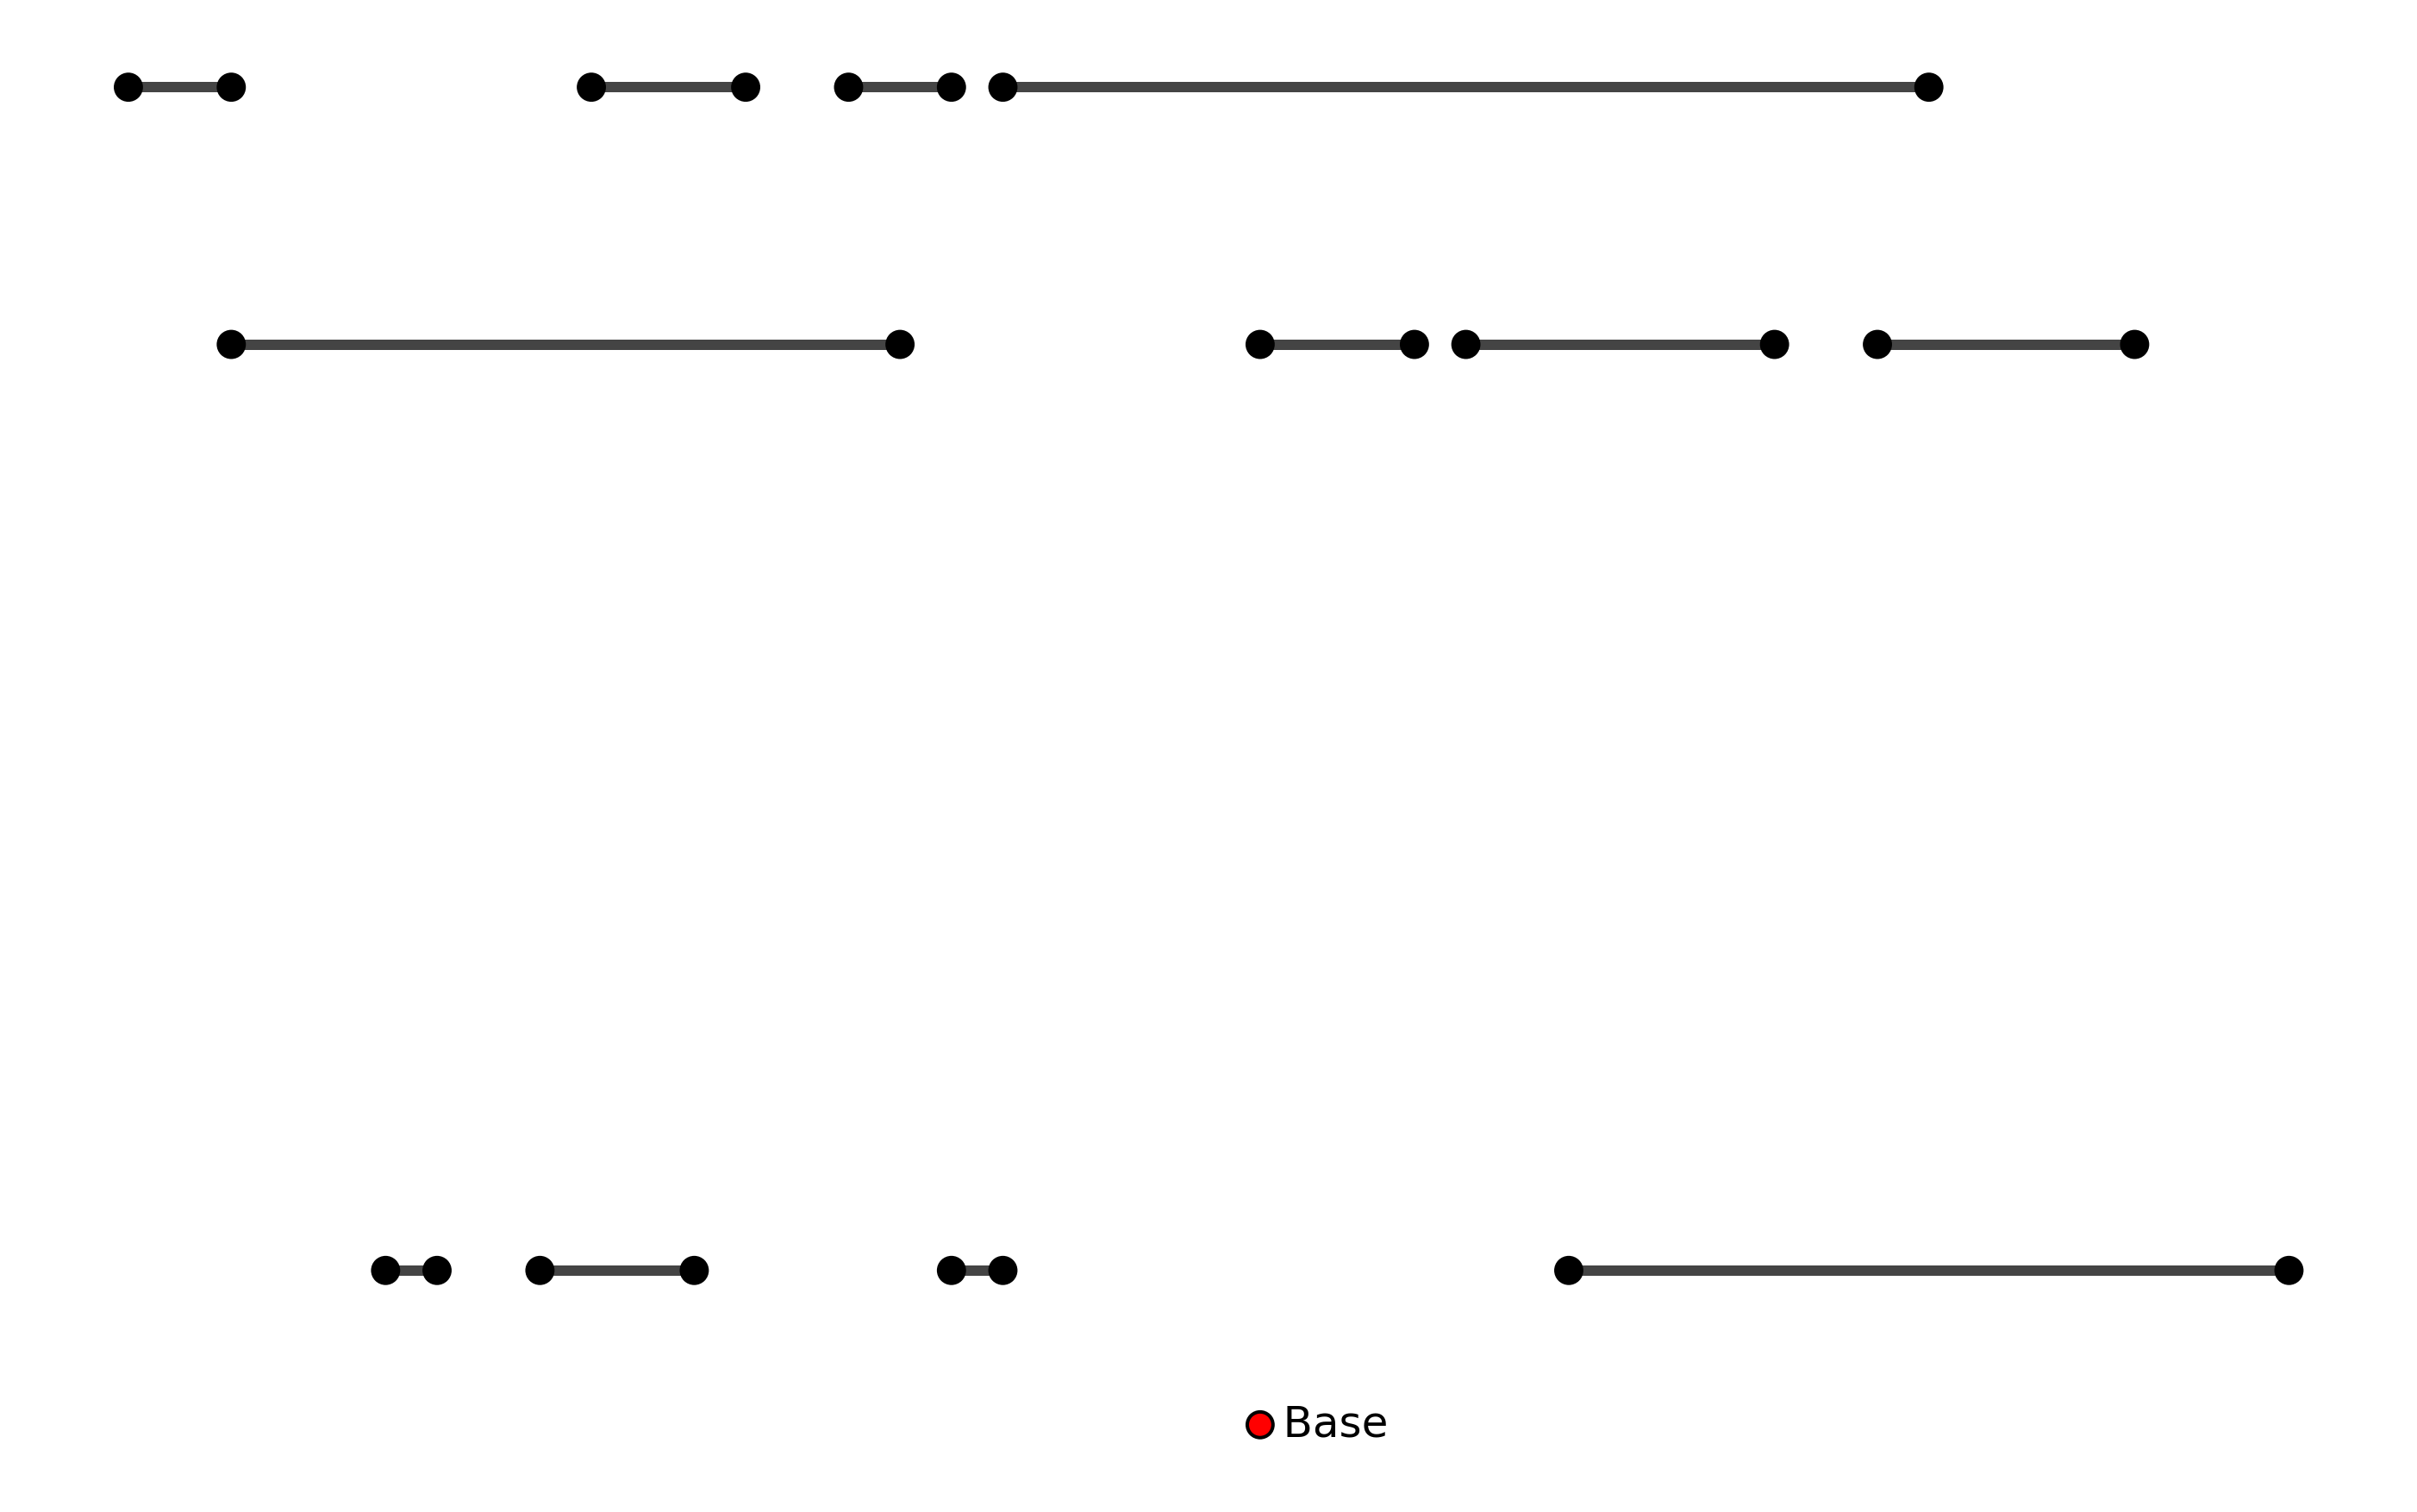

In [14]:
PlotTheGraph(g)

In [15]:
edge

array([[ 0.,  1.],
       [ 2.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.],
       [10., 11.],
       [12., 13.],
       [14., 15.],
       [16., 17.],
       [18., 19.],
       [20., 21.],
       [22., 23.]])

In [16]:
g.vs[2]

igraph.Vertex(<igraph.Graph object at 0x00000295A22BFA40>, 2, {'x': 11.0, 'y': 3.0, 'group': 1, 'base': False})

In [17]:
g_group = ig.Graph(n_vertices//2+1)

In [18]:
def PlotGroupGraph(g):
#    color_dict_vs = {True: "red", False: "black"}
#    edge_width = [2 + 10 * int(is_segment) for is_segment in g.es["is_segment"]]
#    vertex_color = [color_dict_vs[base] for base in g.vs["base"]]
    fig, ax = plt.subplots(figsize=(10,10))
    ig.plot(
        g,
        target=ax,
        layout='auto',
        vertex_size = 0.3,
        vertex_frame_width=4.0,
#        vertex_color = vertex_color,
#        edge_width = edge_width,
    )
    plt.show()

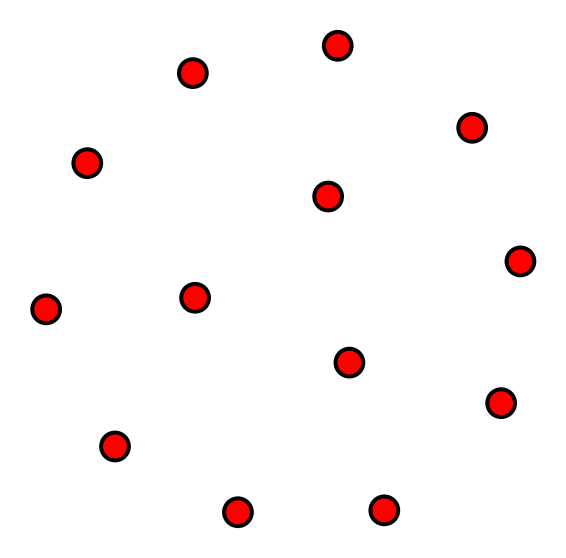

In [19]:
PlotGroupGraph(g_group)

In [20]:
n_vertices//2

12

In [21]:
k = np.asarray(g_group.degree())

In [22]:
g.vs[24]["group"]=12

In [23]:
while (np.sum(k<2)>1):
    i=np.argmin(k)
    k[i]+=1
    j=np.argmin(k)
    k[j]+=1
    g_group.add_edges([(i,j)])
    print("groups: ",i, j)
    seg1=np.where(np.asarray(g.vs["group"])==i)
    print(seg1)
    if (np.shape(seg1)[1]==2):
        if (g.degree(seg1[0][0])<=g.degree(seg1[0][1])):
            print("The degree of", seg1[0][0], "is", g.degree(seg1[0][0]))
            print("The degree of", seg1[0][1], "is", g.degree(seg1[0][1]))
            q=seg1[0][0]
        else: q=seg1[0][1]
    else: q=seg1[0][0]
        
    seg2=np.where(np.asarray(g.vs["group"])==j)
    print(seg2)
    if (np.shape(seg2)[1]==2):
        if (g.degree(seg2[0][0])<=g.degree(seg2[0][1])):
            print("The degree of", seg2[0][0], "is", g.degree(seg2[0][0]))
            print("The degree of", seg2[0][1], "is", g.degree(seg2[0][1]))
            r=seg2[0][0]
        else: r=seg2[0][1]
    else: r=seg2[0][0]
        
    print("connect nodes: ",q, r)
    g.add_edges([(q,r)])
    g.es[g.get_eid(q, r)]["is_segment"] = False  
    

# TODO: Avoid two equal connections


groups:  0 1
(array([0, 1], dtype=int64),)
The degree of 0 is 1
The degree of 1 is 1
(array([2, 3], dtype=int64),)
The degree of 2 is 1
The degree of 3 is 1
connect nodes:  0 2
groups:  2 3
(array([4, 5], dtype=int64),)
The degree of 4 is 1
The degree of 5 is 1
(array([6, 7], dtype=int64),)
The degree of 6 is 1
The degree of 7 is 1
connect nodes:  4 6
groups:  4 5
(array([8, 9], dtype=int64),)
The degree of 8 is 1
The degree of 9 is 1
(array([10, 11], dtype=int64),)
The degree of 10 is 1
The degree of 11 is 1
connect nodes:  8 10
groups:  6 7
(array([12, 13], dtype=int64),)
The degree of 12 is 1
The degree of 13 is 1
(array([14, 15], dtype=int64),)
The degree of 14 is 1
The degree of 15 is 1
connect nodes:  12 14
groups:  8 9
(array([16, 17], dtype=int64),)
The degree of 16 is 1
The degree of 17 is 1
(array([18, 19], dtype=int64),)
The degree of 18 is 1
The degree of 19 is 1
connect nodes:  16 18
groups:  10 11
(array([20, 21], dtype=int64),)
The degree of 20 is 1
The degree of 21 is 1

In [24]:
k

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

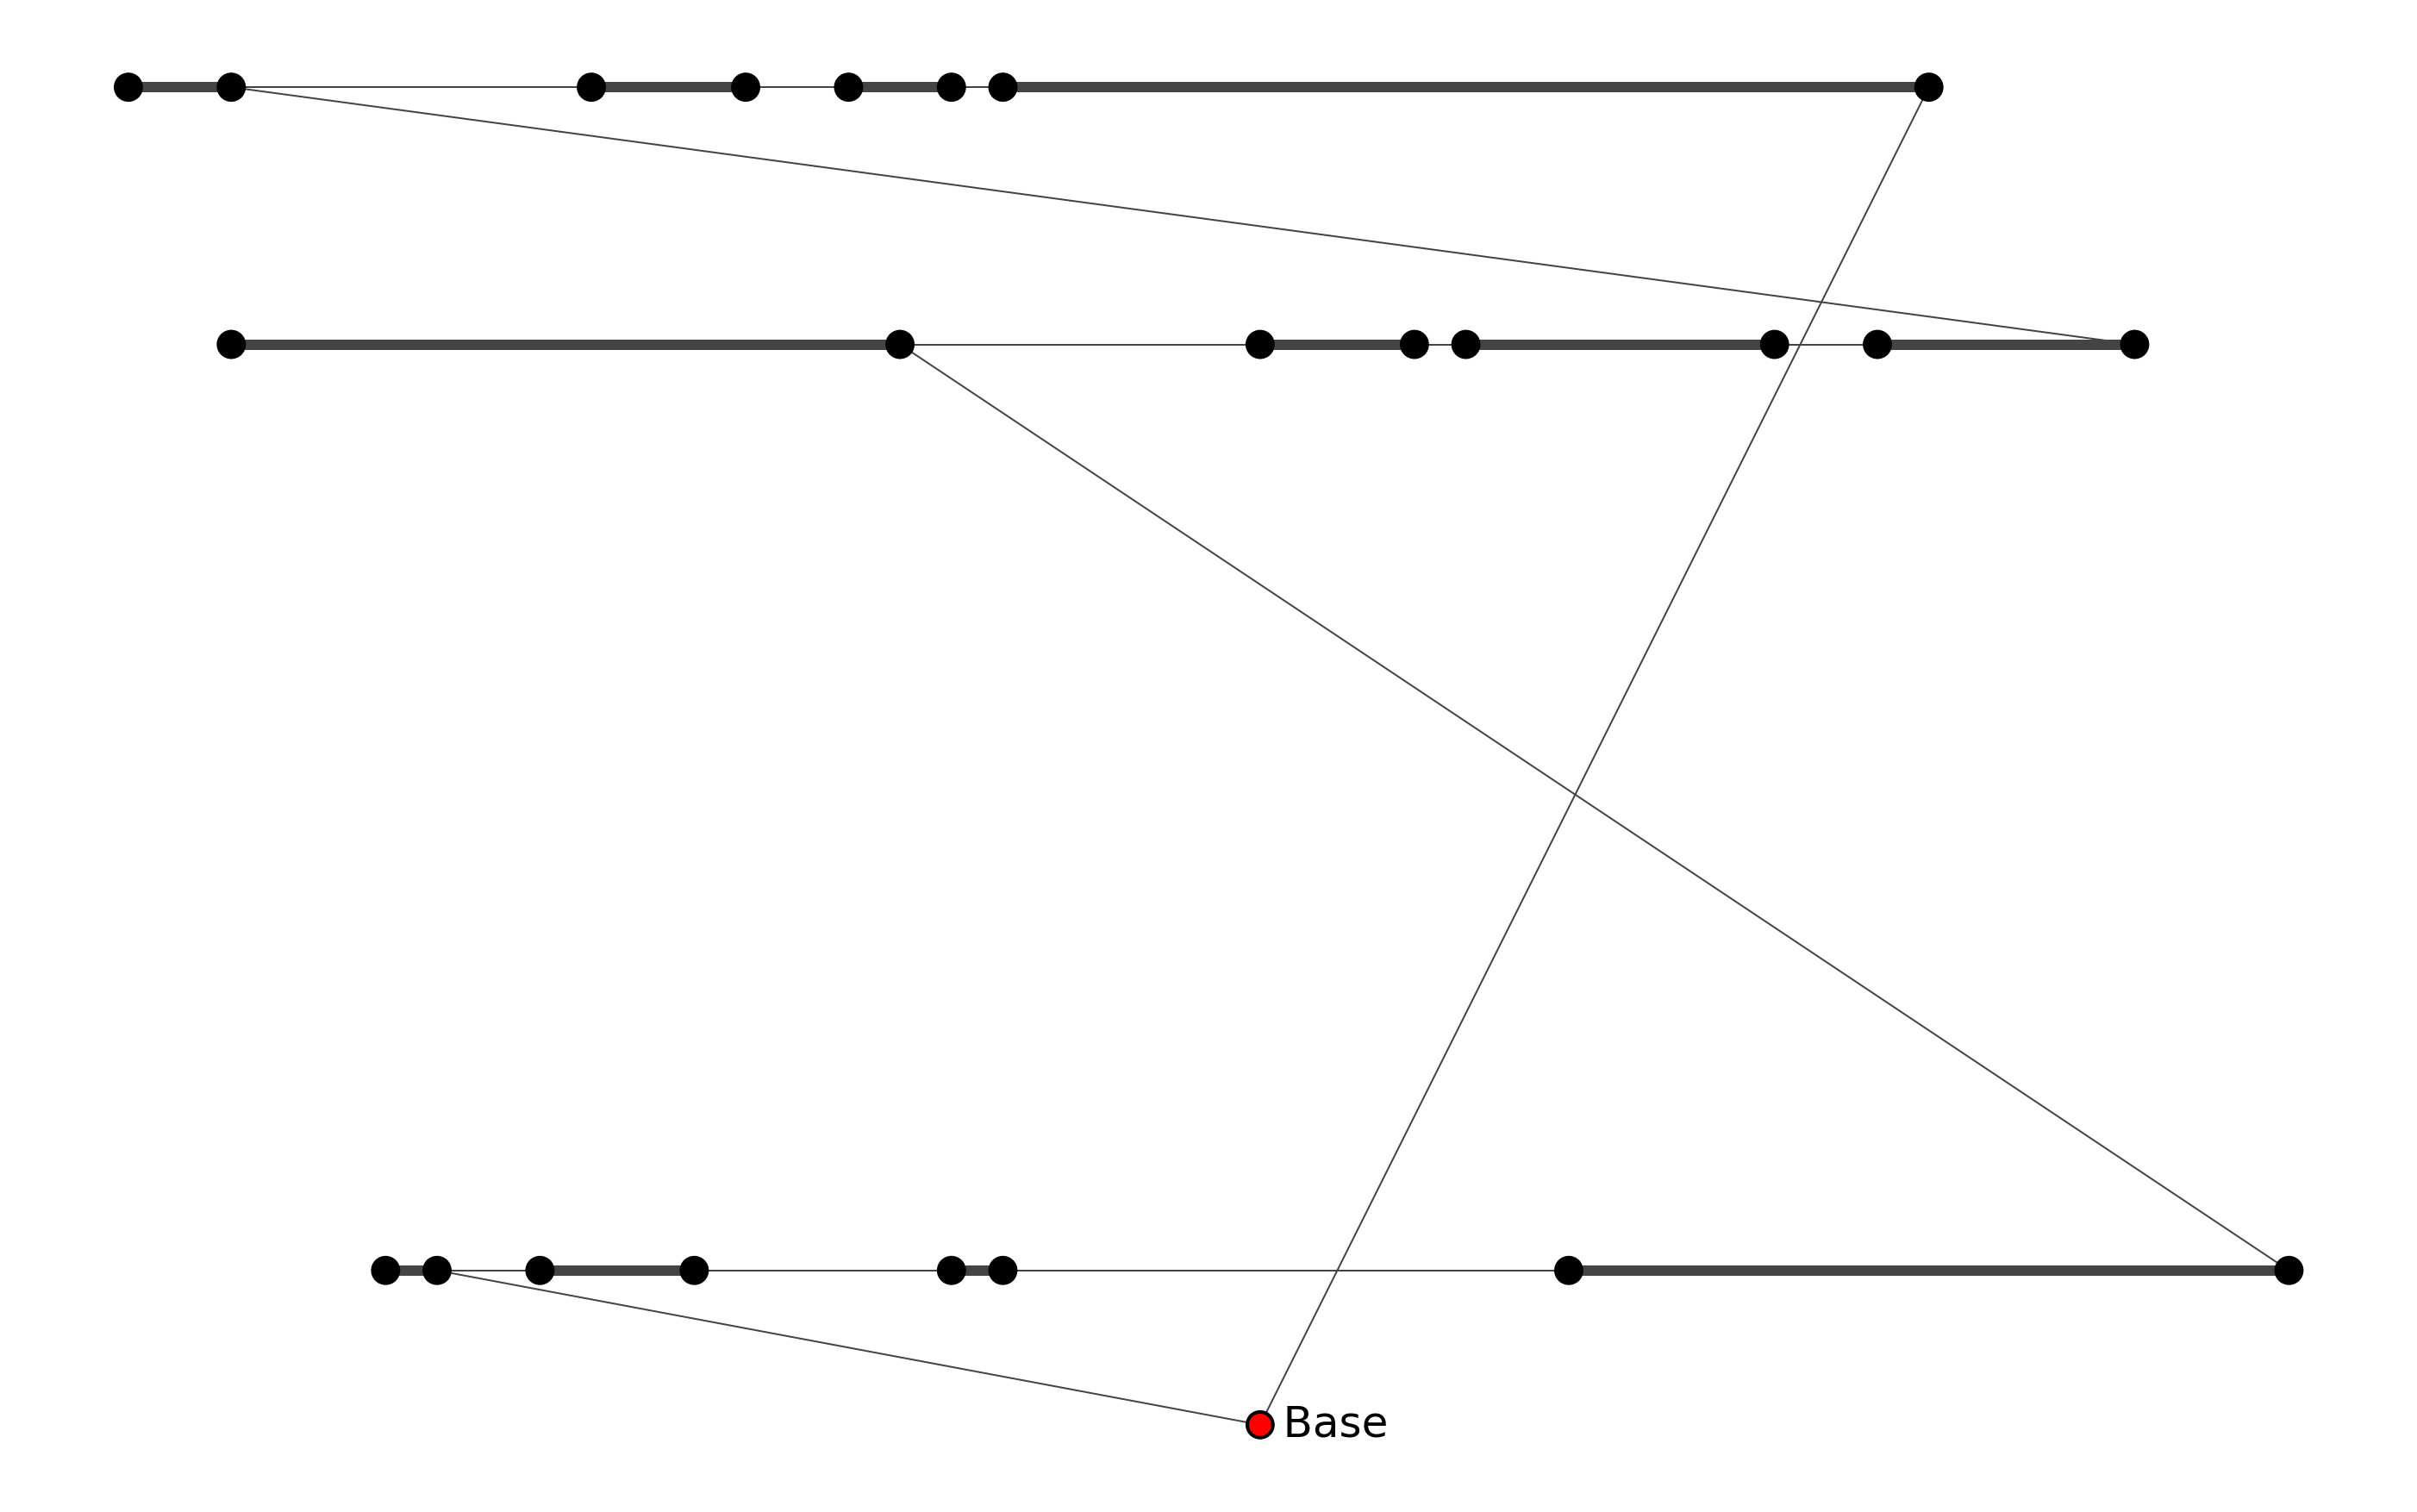

In [25]:
PlotTheGraph(g)

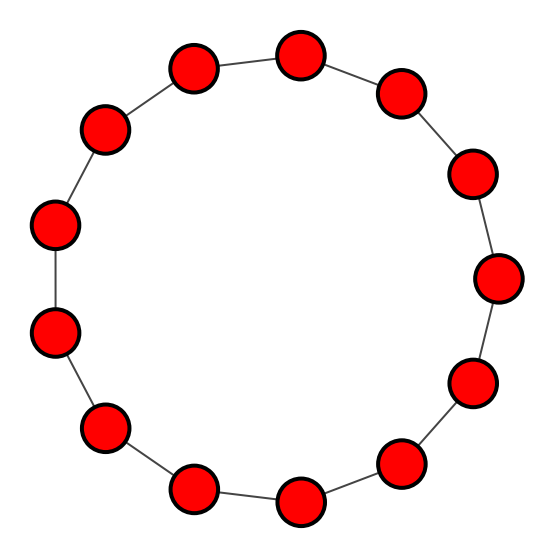

In [26]:
PlotGroupGraph(g_group)

In [27]:
while (np.sum(k<2)>1):
    i=np.argmin(k)
    k[i]+=1
    j=np.argmin(k)
    k[j]+=1
    g_group.add_edges([(i,j)])

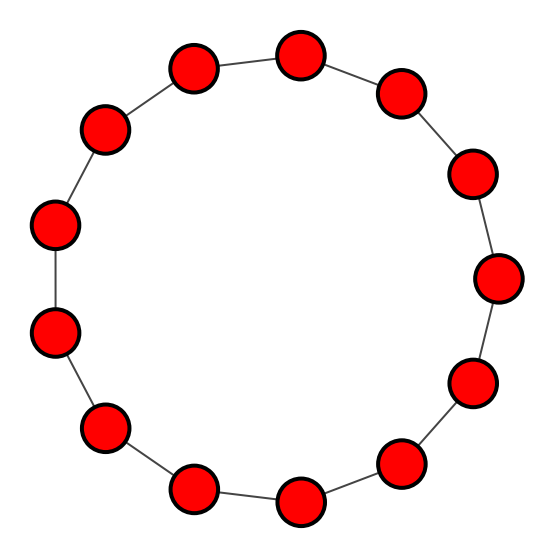

In [28]:
PlotGroupGraph(g_group)

In [29]:
while (np.sum(k<3)>1):
    i=np.argmin(k)
    k[i]+=1
    j=np.argmin(k)
    k[j]+=1
    g_group.add_edges([(i,j)])

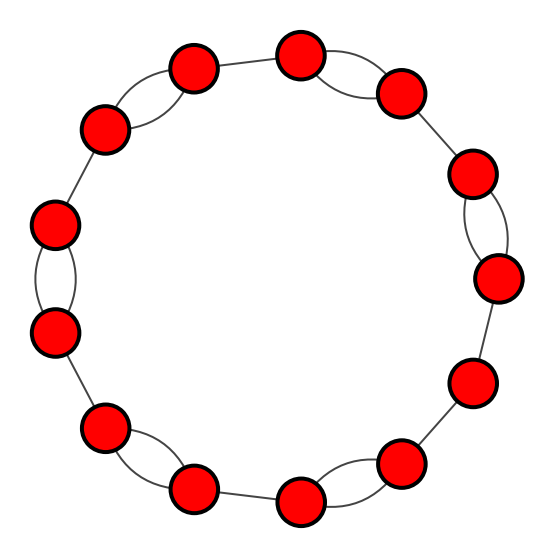

In [30]:
PlotGroupGraph(g_group)

In [31]:
while (np.sum(k<4)>1):
    i=np.argmin(k)
    k[i]+=1
    j=np.argmin(k)
    k[j]+=1
    g_group.add_edges([(i,j)])

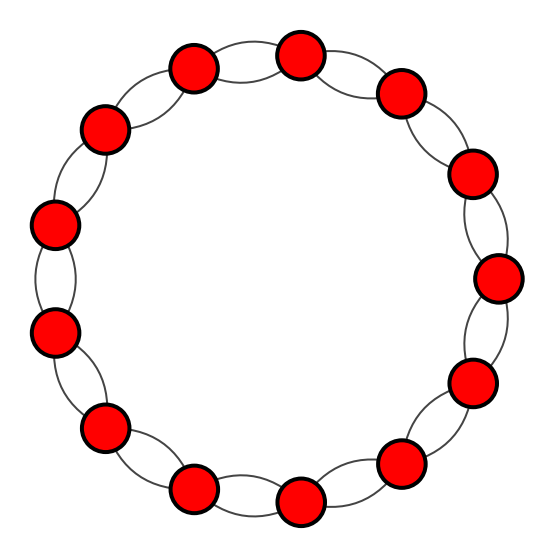

In [32]:
PlotGroupGraph(g_group)

In [33]:
w=np.where(np.asarray(g.vs["group"])==0)

In [34]:
w[0][1] 

1

In [35]:
np.argmin(w[0])

0

In [36]:
g.vs["group"][0]==0

True

In [37]:
min(g.degree(w[0][0]),g.degree(w[0][1]))

2

In [38]:
g.es([(0,1)])["is_segment"]

TypeError: bad argument type for built-in operation